# NYC Delivery Truck Congestion – Step 1 & Step 2 Clean Notebook  
*Author: Karan Chauhan*  

This notebook covers:
- Step 1: Fetching and preparing the foundational dataset  
- Step 2: Exploratory analysis (time, geography, clustering)

## Step 1 — Data Fetching and Cleaning

In this step, we:
- Fetch Manhattan 311 complaints from NYC Open Data API  
- Use two date windows (2023 → June 2024, and June 2024 → present)  
- Trim to 2023-present  
- Keep only necessary columns  
- Save the cleaned dataset using new filenames


In [14]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import StandardScaler

In [2]:
def fetch_range(start_date, end_date=None, limit=50000, cap=1_000_000):
    base = "https://data.cityofnewyork.us/resource/erm2-nwe9.csv"

    where = f"borough='MANHATTAN' AND created_date >='{start_date}'"
    if end_date:
        where += f" AND created_date < '{end_date}'"

    params = (
        f"$where={where}"
        "&$order=created_date"
        f"&$limit={limit}"
    )

    dfs, offset = [], 0
    while True:
        url = f"{base}?{params}&$offset={offset}".replace(" ", "%20")
        chunk = pd.read_csv(url)
        if chunk.empty:
            break
        dfs.append(chunk)
        offset += len(chunk)
        print("Fetched:", offset)
        if offset >= cap:
            break

    df = pd.concat(dfs, ignore_index=True)

    cols = ['created_date','complaint_type','descriptor','borough','latitude','longitude','street_name']
    df = df[[c for c in cols if c in df.columns]]

    return df

### Fetching and combining both date windows


In [3]:
df_early = fetch_range("2023-01-01T00:00:00")
df_late = fetch_range("2024-06-14T00:00:00")

df = pd.concat([df_early, df_late], ignore_index=True).drop_duplicates()
df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')

df = df[df['created_date'] >= '2023-01-01'].copy()
df.to_csv("../data/311_manhattan_clean_2023_present.csv", index=False)

df.head()

C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 50000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 100000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18,20,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 150000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 200000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18,20,31) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 250000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 300000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 350000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 400000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 450000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 500000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 550000
Fetched: 600000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 650000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 700000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18,32) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 750000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18,32) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 800000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (32,36) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 850000
Fetched: 900000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18,32) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 950000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18,32) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 1000000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18,32) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 50000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 100000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18,32,36) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 150000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 200000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18,36) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 250000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18,20,32) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 300000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 350000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 400000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 450000
Fetched: 500000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 550000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 600000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18,32) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 650000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 700000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 750000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 800000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18,32) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 850000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18,20,32) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 900000


C:\Users\karan\AppData\Local\Temp\ipykernel_23940\2575630451.py:17: DtypeWarning: Columns (18,36) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk = pd.read_csv(url)


Fetched: 950000
Fetched: 1000000


,created_date,complaint_type,descriptor,borough,latitude,longitude,street_name
0,2023-01-01 00:00:45,Illegal Parking,Posted Parking Sign Violation,MANHATTAN,40.754875,-74.000747,HUDSON BOULEVARD
1,2023-01-01 00:01:18,HEAT/HOT WATER,ENTIRE BUILDING,MANHATTAN,40.805413,-73.953692,WEST 118 STREET
2,2023-01-01 00:02:14,Noise - Residential,Loud Music/Party,MANHATTAN,40.819185,-73.952819,WEST 135 STREET
3,2023-01-01 00:02:22,Encampment,NaN,MANHATTAN,40.767615,-73.985946,9 AVENUE
4,2023-01-01 00:03:26,Noise - Residential,Loud Music/Party,MANHATTAN,40.779625,-73.951825,EAST 88 STREET


## Step 2 — Filtering and Exploratory Data Analysis

Here we:
- Apply the broader truck-related filter  
- Add time features (hour, day-of-week, month)  
- Plot distributions  
- Generate heatmaps  
- Perform DBSCAN clustering  
- Save all cleaned analysis files with new names


In [4]:
curb_types = [
    "Illegal Parking", "Blocked Driveway", "Blocked Sidewalk", "Blocked Crosswalk",
    "Commercial Overnight Parking", "Double Parked Commercial Vehicle",
    "No Standing", "No Parking", "Traffic", "Obstruction"
]

keywords = [
    "truck", "delivery", "commercial", "double park", "loading",
    "block", "blocking", "standing", "no standing"
]

df_curb = df[df["complaint_type"].isin(curb_types)].copy()
mask = df_curb["descriptor"].str.lower().str.contains("|".join(keywords), na=False)
df_broad = df_curb[mask].copy()

df_broad.to_csv("../data/311_truck_broad_filtered.csv", index=False)
len(df_broad)

110787

In [5]:
df_broad["hour"] = df_broad["created_date"].dt.hour
df_broad["day_of_week"] = df_broad["created_date"].dt.day_name()
df_broad["month"] = df_broad["created_date"].dt.month_name()

### Hourly and Day-of-Week Plots

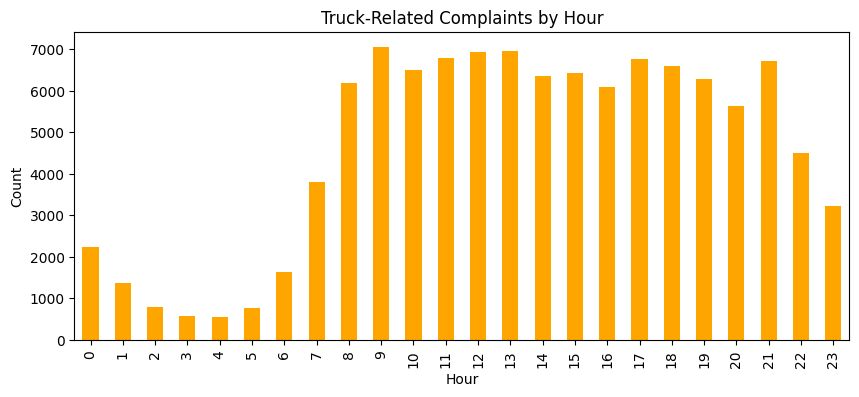

In [6]:
df_broad['hour'].value_counts().sort_index().plot(
    kind='bar', figsize=(10,4), color='orange'
)
plt.title("Truck-Related Complaints by Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

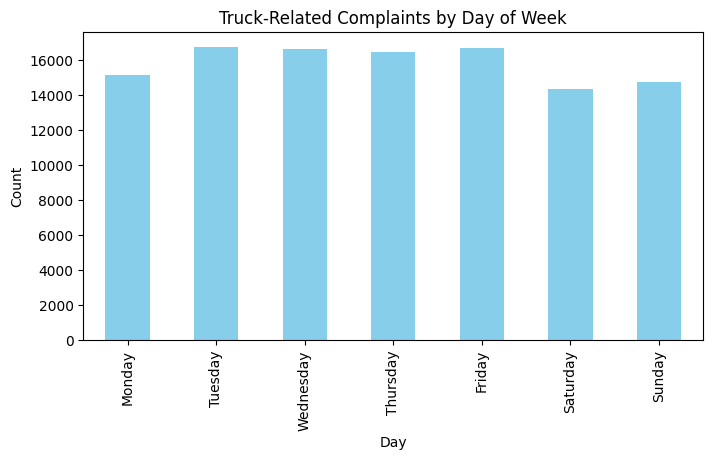

In [7]:
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df_broad['day_of_week'].value_counts().reindex(order).plot(
    kind='bar', figsize=(8,4), color='skyblue'
)
plt.title("Truck-Related Complaints by Day of Week")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()

### Heatmap of Truck-Related Complaints

In [8]:
df_heat = df_broad.dropna(subset=['latitude','longitude'])

m = folium.Map(location=[40.7831, -73.9712], zoom_start=12, tiles="CartoDB Positron")
HeatMap(df_heat[['latitude','longitude']].values.tolist(), radius=8, blur=10).add_to(m)

m.save("../data/truck_heatmap_broad.html")
"Heatmap saved"

'Heatmap saved'

### Final Dataset Checks

In [10]:
print("Raw complaint types:\n", df["complaint_type"].value_counts().head(20))
print("\nFiltered complaint types:\n", df_broad["complaint_type"].value_counts())
print("\nClusters:\n", df_cluster["cluster"].value_counts().head(20))
print("Total clusters:", df_cluster["cluster"].nunique())

Raw complaint types:
 complaint_type
Illegal Parking               193589
Noise - Residential           174817
HEAT/HOT WATER                162553
Noise - Street/Sidewalk       150043
Homeless Person Assistance     72203
Noise - Commercial             62178
Noise - Helicopter             58920
Noise                          58098
Encampment                     56645
UNSANITARY CONDITION           55549
Vendor Enforcement             40071
For Hire Vehicle Complaint     36917
PLUMBING                       35031
Street Condition               34534
Dirty Condition                34450
Noise - Vehicle                33909
PAINT/PLASTER                  29721
Water System                   29493
Rodent                         29452
DOOR/WINDOW                    24100
Name: count, dtype: int64

Filtered complaint types:
 complaint_type
Illegal Parking    110675
Traffic               112
Name: count, dtype: int64

Clusters:
 cluster
 0    109626
-1       144
 1        20
Name: count, dtyp